In [270]:
import numpy as np 
import pandas as pd 

In [271]:
#Dataset:
#https://climatologia.meteochile.gob.cl/application/historicos/datosDescarga/330020

In [272]:
import pandas as pd
df = pd.read_csv("../input/330020_XXXX_Temperatura_.csv", sep = ';' ,parse_dates = True)

In [273]:
df.columns

Index(['CodigoNacional', 'momento', 'Ts_Valor'], dtype='object')

In [274]:
df.head()

,CodigoNacional,momento,Ts_Valor
0,330020,01-03-1967 00:00:00,NaN
1,330020,01-03-1967 12:00:00,12.9
2,330020,01-03-1967 18:00:00,25.0
3,330020,02-03-1967 00:00:00,19.8
4,330020,02-03-1967 12:00:00,15.0


In [275]:
len(df)

140091

In [276]:
df.describe()

,CodigoNacional,Ts_Valor
count,140091.0,139969.000000
mean,330020.0,16.253991
std,0.0,7.279919
min,330020.0,-3.300000
25%,330020.0,10.800000
50%,330020.0,15.500000
75%,330020.0,21.700000
max,330020.0,38.000000


In [277]:
df = df.drop(columns = 'CodigoNacional')

In [278]:
df.columns = ['date','temp']

In [279]:
np.sum(df.isnull(), axis = 0)

date      0
temp    122
dtype: int64

In [280]:
df['temp'] = df['temp'].fillna(df['temp'].mean())

In [281]:
import matplotlib.pyplot as plt

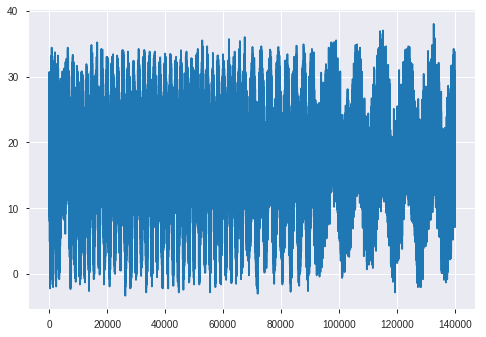

In [282]:
plt.plot(df['temp'])
plt.show()

In [283]:
df = df.set_index('date')

In [284]:
df.loc['30-11-2019 06:00:00']

temp    14.5
Name: 30-11-2019 06:00:00, dtype: float64

In [285]:
df.index.is_monotonic

False

In [286]:
df.loc['30-10-2019 06:00:00':'30-11-2019 06:00:00']

,temp
date,
30-10-2019 06:00:00,9.4
30-10-2019 07:00:00,7.8
30-10-2019 08:00:00,6.7
30-10-2019 09:00:00,7.1
30-10-2019 10:00:00,5.8
...,...
30-11-2019 02:00:00,19.7
30-11-2019 03:00:00,18.7
30-11-2019 04:00:00,17.5


In [287]:
df.index = pd.to_datetime(df.index)

In [288]:
days_freq = []
for i in range(1,8):
    days_freq.append(sum(df.index.day == i))
    print(days_freq[i-1])

4583
4511
4450
4443
4437
4632
4633


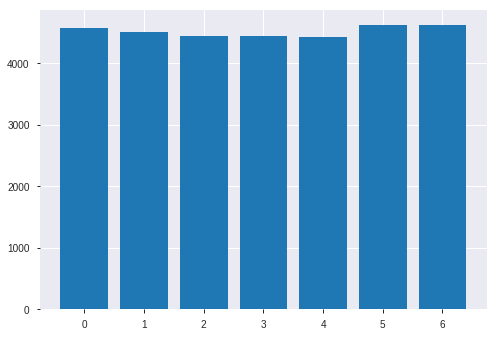

In [289]:
plt.bar(range(7),days_freq)
plt.show()

In [290]:
df = df.sort_index()

In [291]:
df.index.is_monotonic

True

In [292]:
df.index[2] ,df.index[3], df.index[3].hour

(Timestamp('1967-01-03 18:00:00'), Timestamp('1967-01-04 00:00:00'), 0)

In [293]:
df.head(10)

,temp
date,
1967-01-03 00:00:00,16.253991
1967-01-03 12:00:00,12.900000
1967-01-03 18:00:00,25.000000
1967-01-04 00:00:00,18.000000
1967-01-04 12:00:00,11.200000
1967-01-04 18:00:00,24.400000
1967-01-05 00:00:00,16.253991
1967-01-05 12:00:00,5.000000
1967-01-05 18:00:00,20.200000


In [294]:
#df = df.reset_index()

In [312]:
#df = df.groupby([df['date'].dt.date]).max()

In [319]:
df = df.groupby([df.index.date]).max()

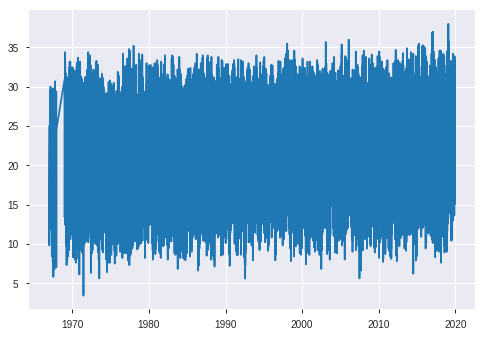

In [320]:
plt.plot(df['temp'])

In [321]:
df.index[0]

datetime.date(1967, 1, 3)

In [322]:
df.head()

,temp
1967-01-03,25.0
1967-01-04,24.4
1967-01-05,20.2
1967-01-06,9.8
1967-01-07,16.6


In [323]:
from datetime import date

In [325]:
#df['1967-01-03 ':'1967-01-05' ]

In [326]:
df[df.index > date(2002,1,1)]

,temp
2002-01-02,32.4
2002-01-03,29.8
2002-01-04,22.0
2002-01-05,20.8
2002-01-06,11.6
...,...
2019-12-07,15.1
2019-12-08,16.9
2019-12-09,25.9
2019-12-10,18.8


# 2016-2017 Summer

In [329]:
startdate = pd.to_datetime("2016-12-22").date()
enddate = pd.to_datetime("2017-3-21").date()
summer = df.loc[startdate:enddate]

In [330]:
summer

,temp
2016-12-22,28.7
2016-12-23,29.3
2016-12-24,28.1
2016-12-25,24.9
2016-12-26,22.1
...,...
2017-03-17,29.5
2017-03-18,31.5
2017-03-19,28.5
2017-03-20,27.8


In [331]:
block_max = []
for i in range(9):
    block_max.append(summer[i*10:(i+1)*10].max(axis = 0))

In [332]:
block_max

[temp    32.4
 dtype: float64, temp    32.0
 dtype: float64, temp    36.5
 dtype: float64, temp    37.0
 dtype: float64, temp    33.3
 dtype: float64, temp    32.6
 dtype: float64, temp    34.5
 dtype: float64, temp    28.0
 dtype: float64, temp    31.5
 dtype: float64]

In [333]:
import matplotlib.pyplot as plt

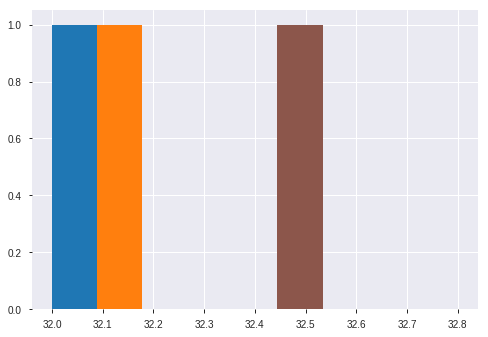

In [334]:
plt.hist(block_max, bins = 'auto')
plt.show()

# All summers

In [335]:
block_max = []


for i in range(1970,2018):
    startdate = pd.to_datetime(str(i) +"-12-22").date()
    enddate = pd.to_datetime(str(i+1)+"-3-21").date()
    summer = df.loc[startdate:enddate]
    
    for j in range(9):
        block_max.append(summer[j*10:(j+1)*10].max(axis = 0).values[0])

KeyError: "['date'] not found in axis"

In [336]:
len(block_max)

0

In [ ]:
plt.hist(block_max)
plt.show()

In [ ]:
from scipy.stats import genextreme as gev

shape, loc, scale = gev.fit(block_max)


In [ ]:
print(shape,loc,scale)

In [ ]:
rvs = block_max

In [ ]:
xx = np.linspace(20, 50, num=100)
yy = gev.pdf(xx, shape, loc, scale)

plt.hist(block_max, density = True , alpha=.3 ,bins = 10)
plt.plot(xx, yy, 'r-')
plt.show()

In [ ]:
from scipy import stats

In [ ]:
stats.kstest(block_max,'uniform')

In [ ]:
import scipy
scipy.stats.anderson(block_max, dist='gumbel')